In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

"""https://matplotlib.org/3.4.3/gallery/ticks_and_spines/multiple_yaxis_with_spines.html"""


In [13]:
df_temp_file_name = "weather.csv"

In [15]:
df_temp_columns = {
    "date": str,
    "tavg": float,
    "tmin": float,
    "tmax": float
}

In [36]:
df_temp = pd.read_csv(
    df_temp_file_name,
    usecols = df_temp_columns.keys(),
    dtype = df_temp_columns
)

df_temp["date"] = pd.to_datetime(
    df_temp["date"],
    format = "%Y-%m-%d"
)

df_temp["week number"] = df_temp["date"].dt.isocalendar().week
df_temp["year"] = df_temp["date"].dt.isocalendar().year

year_list = [
    2021,
    2022
]

df_temp = df_temp.query(
    " `year` in @year_list " 
) # @ позволяет развернуть список с параметрами в квери запросе

# or
# df_temp = df_temp[
#     df_temp["year"].isin(year_list)
# ]

df_grouped = df_temp.groupby(
    [
        "week number",
        "year"
    ],
    as_index = False
).agg(
    {
        "tavg": "mean",
        "tmin": "mean",
        "tmax": "mean"
    }
).rename(
    columns = {
        "tavg": "mean avg temp per week",
        "tmin": "mean min temp per week",
        "tmax": "mean max temp per week"
    }
).round(2)

df_temp_2021 = df_grouped[
    df_grouped["year"] == 2021
]

df_temp_2022 = df_grouped[
    df_grouped["year"] == 2022
]

In [34]:
df_temp.head(1)

,date,tavg,tmin,tmax,week number,year
1,2021-01-04,0.7,0.3,1.1,1,2021


In [35]:
df_grouped.head(1)

,week number,year,mean avg temp per week,mean min temp per week,mean max temp per week
0,1,2021,-1.24,-1.97,-0.71


In [37]:
df_temp_2021.tail(1)

,week number,year,mean avg temp per week,mean min temp per week,mean max temp per week
102,52,2021,-5.37,-9.17,-3.17


In [38]:
df_temp_2022.tail(1)

,week number,year,mean avg temp per week,mean min temp per week,mean max temp per week
103,52,2022,0.84,-1.6,2.13


In [153]:
tick_params = {
    "size": 5.5, # конечная длина черточек
    "width": 2.5, # ширина черточек
    "labelsize": 11 # размер самой цифры
}

ylabel_params = {
    "fontsize": 15,
    "fontstyle": "italic"
}

In [202]:
def draw_graph(axis, df: pd.DataFrame) -> None:
    # Работа с графиком за 2021 год (axis1)
    axis.grid()
    # Создаем копии y-оси
    mean_min = axis.twinx() # для mean min temp per week
    mean_max = axis.twinx() # для mean max temp per week	

    mean_max.spines.right.set_position(("axes", 1.2)) # Делаем отступ оси с макс температурой от правой оси



    graph_mean_avg, = axis.plot(
        df["week number"],
        df["mean avg temp per week"],
        color = "green",
        marker = "o",
        markersize = 7,
        linestyle = "--",
        linewidth = 2,
        label = "Средняя средняя температура"
    ) # Рисуем сам график, внимание на запятую, она должна быть


    # Настройка осей и их цветов
    axis.set_xlabel(
        "Номера недель",
        fontsize = 20,
        fontstyle = "italic",
        fontweight = "bold"  
    )

    axis.set_ylabel(
        "Средняя средняя температура",
        **ylabel_params
    )

    axis.yaxis.label.set_color(graph_mean_avg.get_color()) # Передаем названию оси цвет самого графика

    axis.tick_params(
        axis = "y", # выбираем интересующую нас ось
        colors = graph_mean_avg.get_color(),
        **tick_params
    )



    graph_mean_min, = mean_min.plot(
        df["week number"],
        df["mean min temp per week"],
        color = "blue",
        marker = "x",
        markersize = 7,
        linewidth = 1,
        label = "Средняя мин температура"
    )

    mean_min.set_ylabel(
        "Средняя минимальная температура",
        **ylabel_params
    )

    mean_min.yaxis.label.set_color(graph_mean_min.get_color())

    mean_min.tick_params(
        axis = "y",
        colors = graph_mean_min.get_color(),
        **tick_params
    )



    graph_mean_max, = mean_max.plot(
        df["week number"],
        df["mean max temp per week"],
        color = "red",
        marker = "s",
        markersize = 7,
        linewidth = 1,
        label = "Средняя макс температура"
    )

    mean_max.set_ylabel(
        "Средняя максимальная температура",
        **ylabel_params
    )

    mean_max.yaxis.label.set_color(graph_mean_max.get_color())

    mean_max.tick_params(
        axis = "y",
        colors = graph_mean_max.get_color(),
        **tick_params
    )

    axis.legend(
        handles = [
            graph_mean_avg,
            graph_mean_min,
            graph_mean_max
        ],
        prop = {
            "size": 6
        }
    )


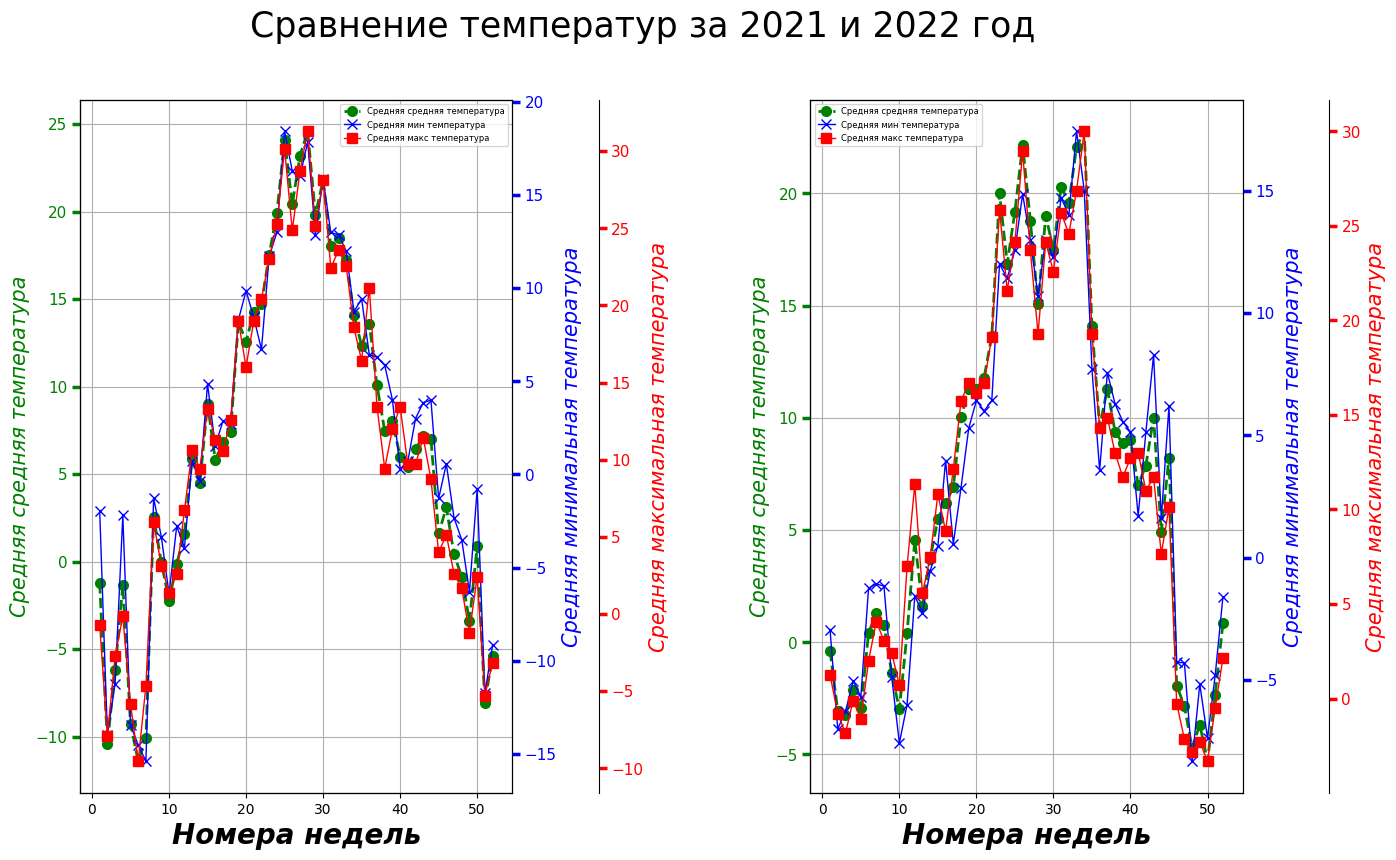

In [204]:
fig, (axis1, axis2) = plt.subplots(
    1,
    2,
    figsize = (15, 9)
) # axis1 будет графиком за 2021 год, а axis2 будет графиком за 2022 года



# Задаем тайтл Основному окну с графиками
fig.suptitle(
    "Сравнение температур за 2021 и 2022 год",
    fontsize = 25
)

draw_graph(
    axis1,
    df_temp_2021
)
draw_graph(
    axis2,
    df_temp_2022
)

plt.subplots_adjust(
    wspace=0.69
) # задаем ширину между графиками


fig.savefig("sksk.png")
